### Import Modul

In [773]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report

### Import Data

#### Data Training

**Load Data Training Hasil Encode** (Belum dinormalisasi)

In [774]:
train = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/train_data_encoded.csv', sep=';')
x_train = train.iloc[:, 2:].values
y_train = train.iloc[:, 1].values
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


**Load Data Training Hasil Normalisasi**

In [775]:
train_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/train_data_normalized.csv', sep=';')
x_train_normalize = train_normalize.iloc[:, 1:-1].values
y_train_normalize = train_normalize.iloc[:, -1].values
train_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,1.0,1.0,0.271174,0.2,0.0,0.014151,1.0,0
1,2,0.0,0.0,0.472229,0.2,0.0,0.139136,0.0,1
2,3,1.0,0.0,0.321438,0.0,0.0,0.015469,1.0,1
3,4,0.0,0.0,0.434531,0.2,0.0,0.103644,1.0,1
4,5,1.0,1.0,0.434531,0.0,0.0,0.015713,1.0,0


#### Data Testing

**Load Data Testing Hasil Encode** (Belum dinormalisasi)

In [776]:
test = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/test_data_encoded.csv', sep=';')

label = pd.read_csv("D:/Code/py_code/Artificial-Neural-Network/Single-Layer-Perceptron/data/test_data_GroundTruth_cl.csv")

x_test = test.iloc[:, 1:].values
y_test = label['Survived'].values

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


**Load Data Training Hasil Normalisasi**

In [777]:
test_normalize = pd.read_csv('D:\Code\py_code\Artificial-Neural-Network\Single-Layer-Perceptron\data/test_data_normalized.csv', sep=';')
x_test_normalize = test_normalize.iloc[:, 1:-1].values
y_test_normalize = test_normalize.iloc[:, -1].values
test_normalize.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,893,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,894,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,895,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,896,1.0,0.0,0.287881,0.125,0.166667,0.023984,1.0,1


### Visualisasi Plot Confussion Matrix

In [778]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    ax.xaxis.set_ticklabels(['Not Survived', 'Survived']);ax.yaxis.set_ticklabels(['Not Survived', 'Survived'])
    plt.show()

### Pembuatan Model Single Layer Perceptron

#### **Model Tensorflow**

In [779]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
keras.utils.set_random_seed(42)
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[len(x_train[0])], activation='sigmoid', kernel_initializer='random_uniform')])
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [780]:
weights = model.get_weights()
weights

[array([[ 0.03581891],
        [ 0.01626286],
        [-0.01412892],
        [ 0.04499895],
        [-0.04219389],
        [ 0.01523323],
        [ 0.04704999]], dtype=float32),
 array([0.], dtype=float32)]

In [781]:
model.fit(x_train_normalize, y_train_normalize, epochs=1000)

predict = model.predict(x_test_normalize)
predict = np.round(predict)
predict = predict.astype(int)
predict = predict.reshape(1, -1)[0]

Epoch 1/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.3778
Epoch 2/1000
23/23 [==============================] - 0s 984us/step - loss: 0.2496 - accuracy: 0.5225
Epoch 3/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2457 - accuracy: 0.5941
Epoch 4/1000
23/23 [==============================] - 0s 985us/step - loss: 0.2423 - accuracy: 0.5955
Epoch 5/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.2390 - accuracy: 0.5955
Epoch 6/1000
23/23 [==============================] - 0s 931us/step - loss: 0.2363 - accuracy: 0.5955
Epoch 7/1000
23/23 [==============================] - 0s 931us/step - loss: 0.2339 - accuracy: 0.5955
Epoch 8/1000
23/23 [==============================] - 0s 872us/step - loss: 0.2319 - accuracy: 0.5955
Epoch 9/1000
23/23 [==============================] - 0s 869us/step - loss: 0.2299 - accuracy: 0.5955
Epoch 10/1000
23/23 [==============================] - 0s 992us/step - loss: 0.2283 - ac

23/23 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.7037
Epoch 65/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.7037
Epoch 66/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.7037
Epoch 67/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1971 - accuracy: 0.7037
Epoch 68/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1967 - accuracy: 0.7037
Epoch 69/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.7037
Epoch 70/1000
23/23 [==============================] - 0s 944us/step - loss: 0.1961 - accuracy: 0.7037
Epoch 71/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.7051
Epoch 72/1000
23/23 [==============================] - 0s 931us/step - loss: 0.1954 - accuracy: 0.7051
Epoch 73/1000
23/23 [==============================] - 0s 1ms/step - loss: 0.1951 - accuracy: 0.7065


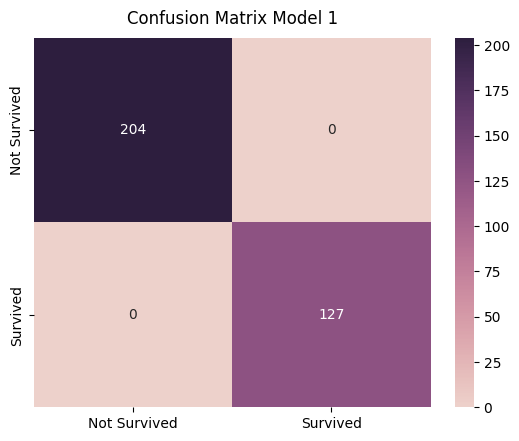

In [782]:
model1_cf1 = confusion_matrix(y_test_normalize, predict)
plot_cm(model1_cf1, 'Model 1')

In [783]:
model1_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model1_report).transpose()

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


#### **Model Binary Step**

In [784]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3,0.3, size=input_size+1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracy = []
        self.testing_accuracy = []

    def _activation_function(self, x):
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate training accuracy at each epoch
            self.training_accuracy.append(self._calculate_accuracy(X_train, y_train))
            self.testing_accuracy.append(self._calculate_accuracy(x_test, y_test))

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)
    
    def get_weights(self):
        return self.weights
    
    def get_accuracy(self):
        return [self.training_accuracy, self.testing_accuracy]

##### **Data dinormalisasi**

In [785]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size, learning_rate=0.01, epochs=1000)
perceptron.train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize)
pred = perceptron.predict(x_test_normalize)

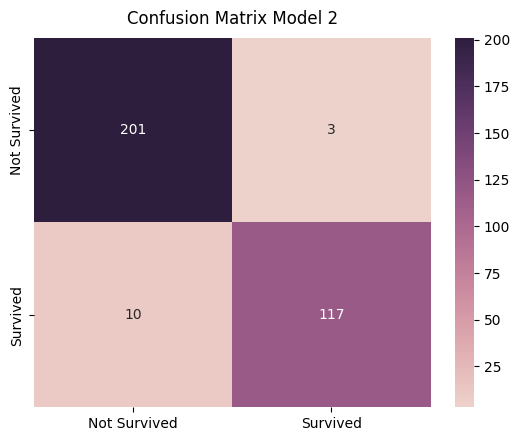

In [786]:
model2_cf = confusion_matrix(y_test_normalize, pred)
plot_cm(model2_cf, 'Model 2')

In [787]:
model2_report = classification_report(y_test_normalize, pred, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model2_report).transpose()

,precision,recall,f1-score,support
Not Survived,0.952607,0.985294,0.968675,204.000000
Survived,0.975000,0.921260,0.947368,127.000000
accuracy,0.960725,0.960725,0.960725,0.960725
macro avg,0.963803,0.953277,0.958022,331.000000
weighted avg,0.961199,0.960725,0.960500,331.000000


##### **Data tidak dinormalisasi**

In [788]:
input_size_2 = x_train.shape[1]
perceptron_2 = SingleLayerPerceptron(input_size, learning_rate=0.01, epochs=1000)
perceptron_2.train(x_train, y_train, x_test, y_test)
pred_2 = perceptron_2.predict(x_test)

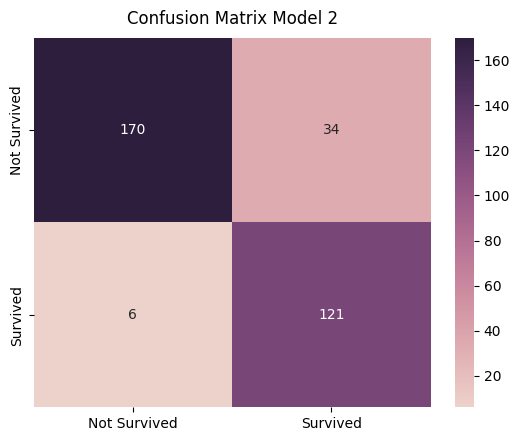

In [789]:
model2_cf2 = confusion_matrix(y_test, pred_2)
plot_cm(model2_cf2, 'Model 2')

In [790]:
model2_report2 = classification_report(y_test, pred_2, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model2_report2).transpose()

,precision,recall,f1-score,support
Not Survived,0.965909,0.833333,0.894737,204.000000
Survived,0.780645,0.952756,0.858156,127.000000
accuracy,0.879154,0.879154,0.879154,0.879154
macro avg,0.873277,0.893045,0.876446,331.000000
weighted avg,0.894826,0.879154,0.880701,331.000000


##### **Menggunakan kolom Sex & Age saja**

In [791]:
# data train 2 kolom
x_train_2col = train_normalize.iloc[:, 2:4].values
y_train_2col = train_normalize.iloc[:, -1].values

# data test 2 kolom
x_test_2col = test_normalize.iloc[:, 2:4].values
y_test_2col = test_normalize.iloc[:, -1].values

In [792]:
input_size = x_train_2col.shape[1]
perceptron_2col = SingleLayerPerceptron(input_size, learning_rate=0.01, epochs=1000)
perceptron_2col.train(x_train_2col, y_train_2col, x_test_2col, y_test_2col)
pred_2col = perceptron_2col.predict(x_test_2col)

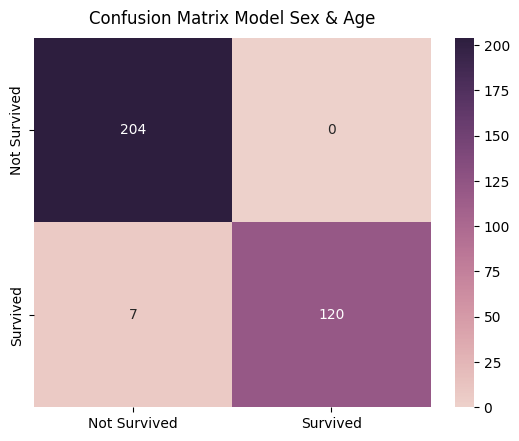

In [793]:
model_cf_2col = confusion_matrix(y_test_2col, pred_2col)
plot_cm(model_cf_2col, 'Model Sex & Age')

In [794]:
model_report_2col = classification_report(y_test_2col, pred_2col, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model_report_2col).transpose()

,precision,recall,f1-score,support
Not Survived,0.966825,1.000000,0.983133,204.000000
Survived,1.000000,0.944882,0.971660,127.000000
accuracy,0.978852,0.978852,0.978852,0.978852
macro avg,0.983412,0.972441,0.977396,331.000000
weighted avg,0.979554,0.978852,0.978731,331.000000


##### **Menggunakan kolom Sex, Age, Pclass, SibSp, Parch**

In [795]:
# data train 3 kolom
x_train_3col = train_normalize.iloc[:, 1:6].values
y_train_3col = train_normalize.iloc[:, -1].values

# data test 3 kolom
x_test_3col = test_normalize.iloc[:, 1:6].values
y_test_3col = test_normalize.iloc[:, -1].values

In [796]:
input_size = x_test_3col.shape[1]
perceptron_3col = SingleLayerPerceptron(input_size, learning_rate=0.01, epochs=1000)
perceptron_3col.train(x_test_3col, y_test_3col, x_test_3col, y_test_3col)
pred_3col = perceptron_3col.predict(x_test_3col)

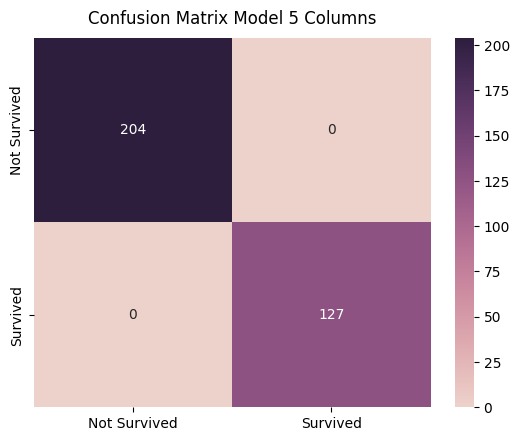

In [797]:
model_cf_3col = confusion_matrix(y_test_3col, pred_3col)
plot_cm(model_cf_3col, 'Model 5 Columns')

In [798]:
model_report_3col = classification_report(y_test_3col, pred_3col, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model_report_3col).transpose()

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


##### **Penggunaan Learning Rate**

In [799]:
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [800]:
input_size = x_train.shape[1]
lr_accuracy = []
lr_pred = []
for lr in learning_rate:
    perceptron_lr = SingleLayerPerceptron(input_size, learning_rate=lr, epochs=1000)
    perceptron_lr.train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize)
    lr_accuracy.append(perceptron_lr.get_accuracy())
    pred_lr = perceptron_lr.predict(x_test_normalize)
    lr_pred.append(pred_lr)

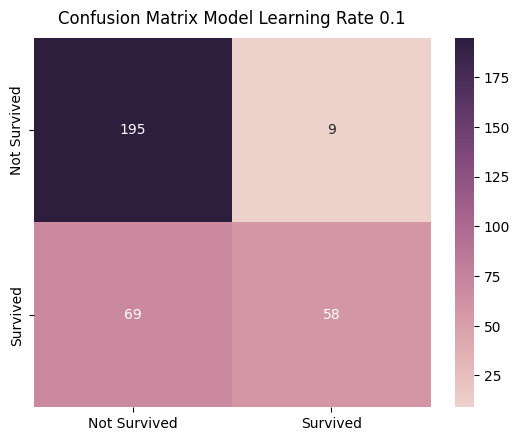

              precision    recall  f1-score    support
Not Survived   0.738636  0.955882  0.833333  204.00000
Survived       0.865672  0.456693  0.597938  127.00000
accuracy       0.764350  0.764350  0.764350    0.76435
macro avg      0.802154  0.706288  0.715636  331.00000
weighted avg   0.787378  0.764350  0.743016  331.00000




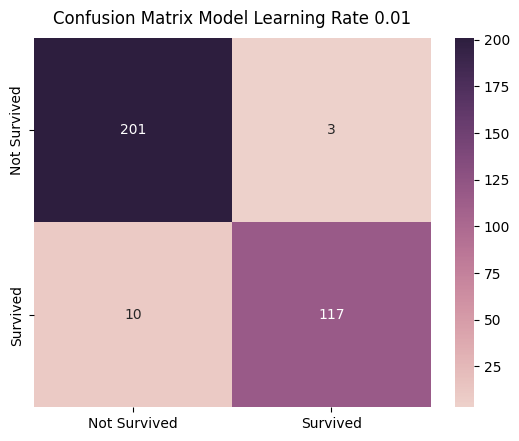

              precision    recall  f1-score     support
Not Survived   0.952607  0.985294  0.968675  204.000000
Survived       0.975000  0.921260  0.947368  127.000000
accuracy       0.960725  0.960725  0.960725    0.960725
macro avg      0.963803  0.953277  0.958022  331.000000
weighted avg   0.961199  0.960725  0.960500  331.000000




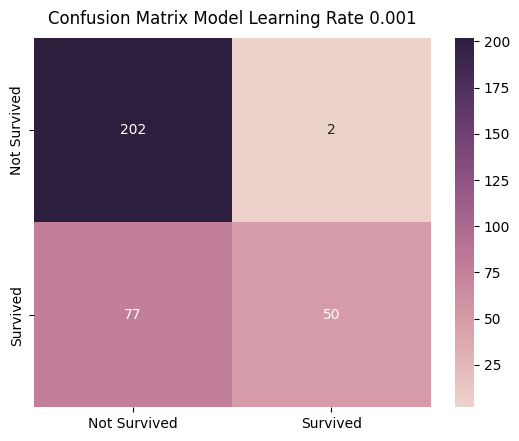

              precision    recall  f1-score     support
Not Survived   0.724014  0.990196  0.836439  204.000000
Survived       0.961538  0.393701  0.558659  127.000000
accuracy       0.761329  0.761329  0.761329    0.761329
macro avg      0.842776  0.691948  0.697549  331.000000
weighted avg   0.815149  0.761329  0.729859  331.000000




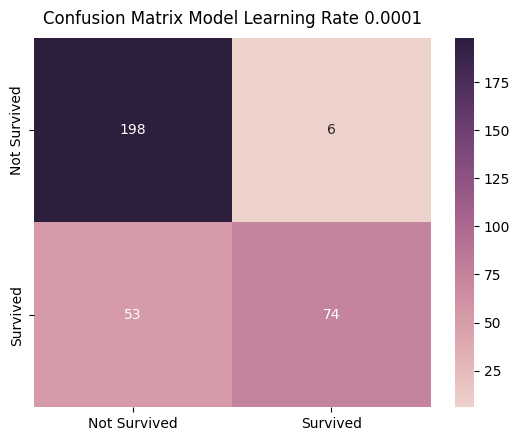

              precision    recall  f1-score     support
Not Survived   0.788845  0.970588  0.870330  204.000000
Survived       0.925000  0.582677  0.714976  127.000000
accuracy       0.821752  0.821752  0.821752    0.821752
macro avg      0.856922  0.776633  0.792653  331.000000
weighted avg   0.841086  0.821752  0.810723  331.000000




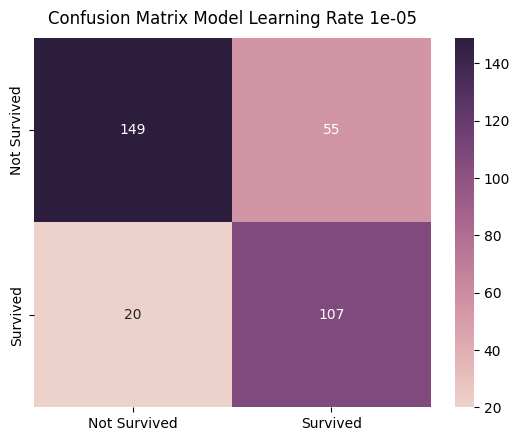

              precision    recall  f1-score     support
Not Survived   0.881657  0.730392  0.798928  204.000000
Survived       0.660494  0.842520  0.740484  127.000000
accuracy       0.773414  0.773414  0.773414    0.773414
macro avg      0.771075  0.786456  0.769706  331.000000
weighted avg   0.796800  0.773414  0.776504  331.000000




In [801]:
for i, lr in enumerate(lr_pred):
    model2_cf_lr = confusion_matrix(y_test_normalize, lr)
    plot_cm(model2_cf_lr, f'Model Learning Rate {learning_rate[i]}')
    model2_report_lr = classification_report(y_test_normalize, lr, output_dict=True, target_names=['Not Survived',"Survived"])
    print(pd.DataFrame(model2_report_lr).transpose())
    print("\n")

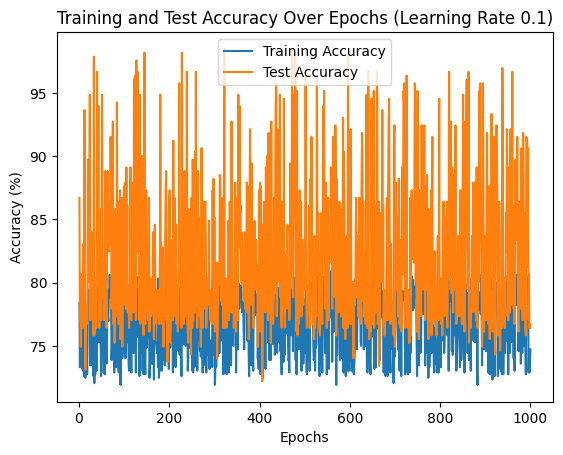

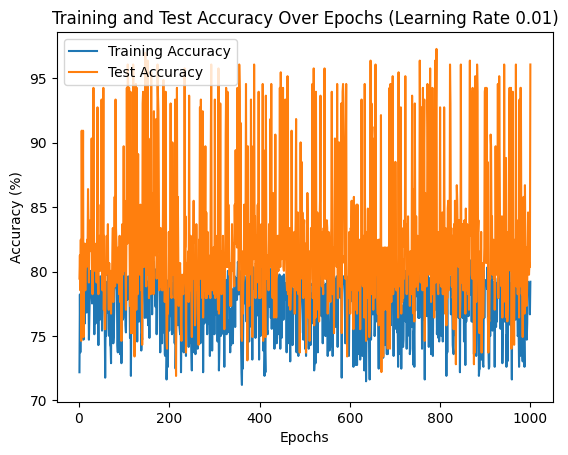

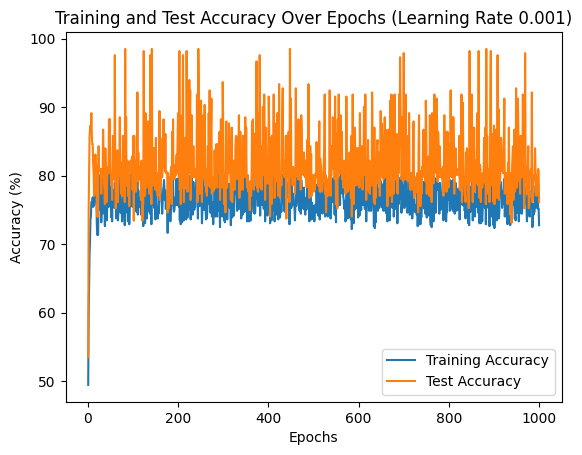

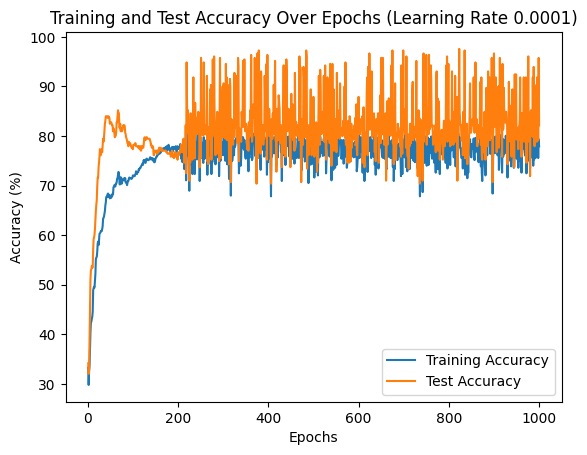

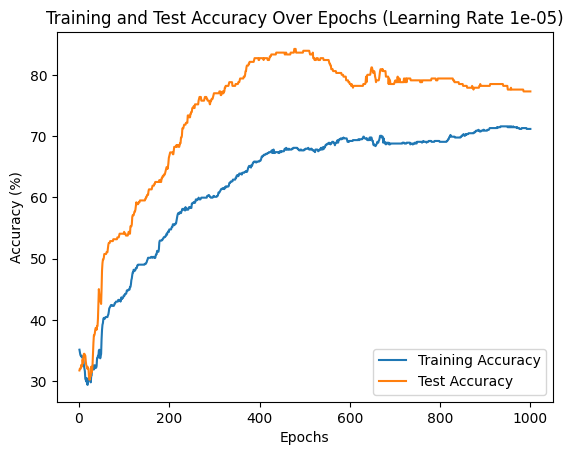

In [802]:
epochs_range = range(1, 1000 + 1)
for i, lr in enumerate(lr_accuracy):
    plt.plot(epochs_range, lr[0], label='Training Accuracy')
    plt.plot(epochs_range, lr[1], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training and Test Accuracy Over Epochs (Learning Rate {learning_rate[i]})')
    plt.legend()
    plt.show()

##### **Penggunaan Epoch**

In [803]:
epochs_range = [10, 50, 100, 500, 1000]

In [804]:
input_size = x_train.shape[1]
epoch_accuracy = []
epoch_pred = []
for epoch in epochs_range:
    perceptron_epoch = SingleLayerPerceptron(input_size, learning_rate=0.01, epochs=epoch)
    perceptron_epoch.train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize)
    epoch_accuracy.append(perceptron_epoch.get_accuracy())
    pred_epoch = perceptron_epoch.predict(x_test_normalize)
    epoch_pred.append(pred_epoch)

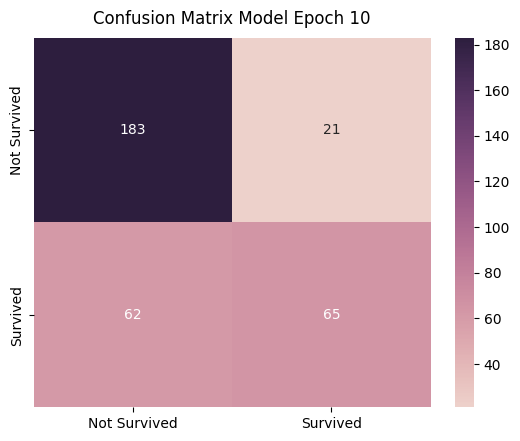

              precision    recall  f1-score     support
Not Survived   0.746939  0.897059  0.815145  204.000000
Survived       0.755814  0.511811  0.610329  127.000000
accuracy       0.749245  0.749245  0.749245    0.749245
macro avg      0.751376  0.704435  0.712737  331.000000
weighted avg   0.750344  0.749245  0.736560  331.000000




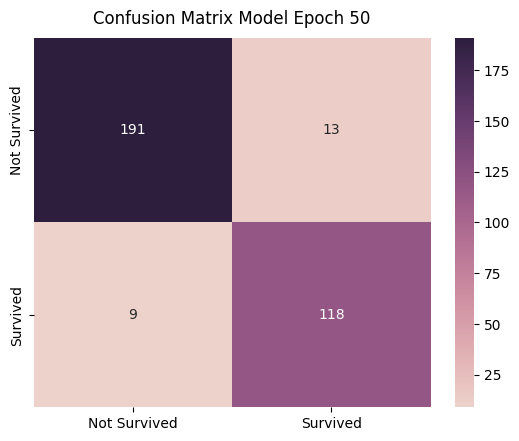

              precision    recall  f1-score     support
Not Survived   0.955000  0.936275  0.945545  204.000000
Survived       0.900763  0.929134  0.914729  127.000000
accuracy       0.933535  0.933535  0.933535    0.933535
macro avg      0.927882  0.932704  0.930137  331.000000
weighted avg   0.934190  0.933535  0.933721  331.000000




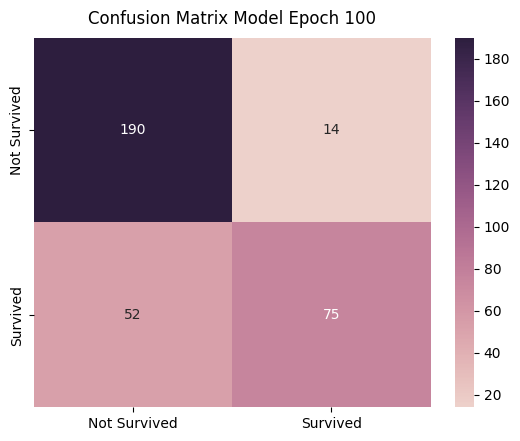

              precision    recall  f1-score     support
Not Survived   0.785124  0.931373  0.852018  204.000000
Survived       0.842697  0.590551  0.694444  127.000000
accuracy       0.800604  0.800604  0.800604    0.800604
macro avg      0.813910  0.760962  0.773231  331.000000
weighted avg   0.807214  0.800604  0.791559  331.000000




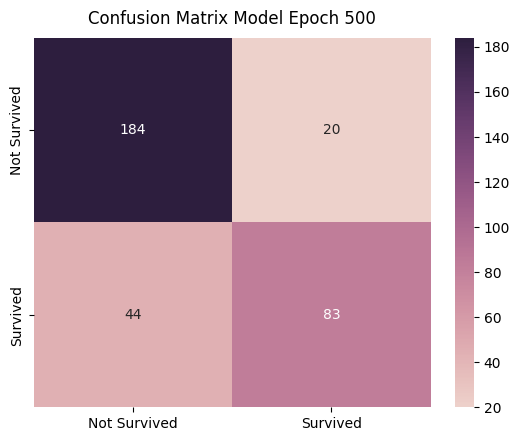

              precision    recall  f1-score     support
Not Survived   0.807018  0.901961  0.851852  204.000000
Survived       0.805825  0.653543  0.721739  127.000000
accuracy       0.806647  0.806647  0.806647    0.806647
macro avg      0.806421  0.777752  0.786795  331.000000
weighted avg   0.806560  0.806647  0.801929  331.000000




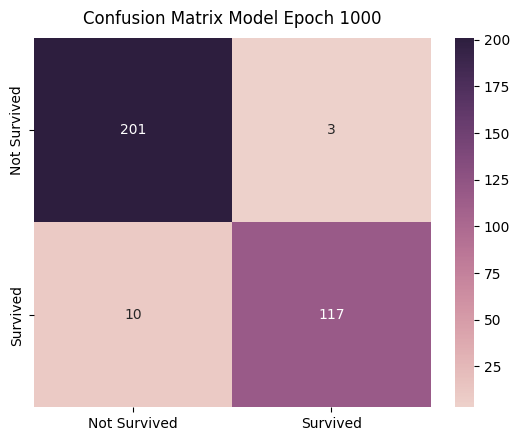

              precision    recall  f1-score     support
Not Survived   0.952607  0.985294  0.968675  204.000000
Survived       0.975000  0.921260  0.947368  127.000000
accuracy       0.960725  0.960725  0.960725    0.960725
macro avg      0.963803  0.953277  0.958022  331.000000
weighted avg   0.961199  0.960725  0.960500  331.000000




In [805]:
for i, epoch in enumerate(epoch_pred):
    model2_cf_epoch = confusion_matrix(y_test_normalize, epoch)
    plot_cm(model2_cf_epoch, f'Model Epoch {epochs_range[i]}')
    model2_report_epoch = classification_report(y_test_normalize, epoch, output_dict=True, target_names=['Not Survived',"Survived"])
    print(pd.DataFrame(model2_report_epoch).transpose())
    print("\n")

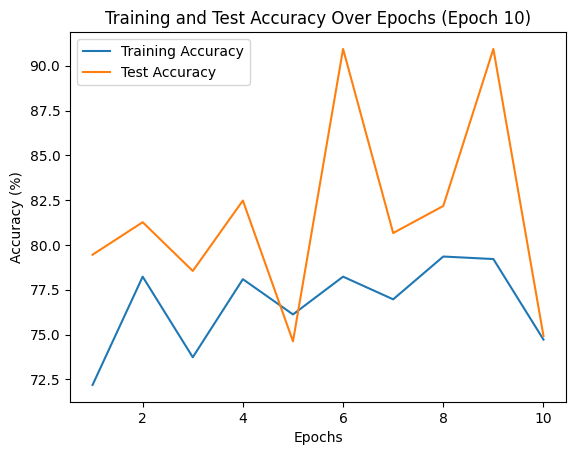

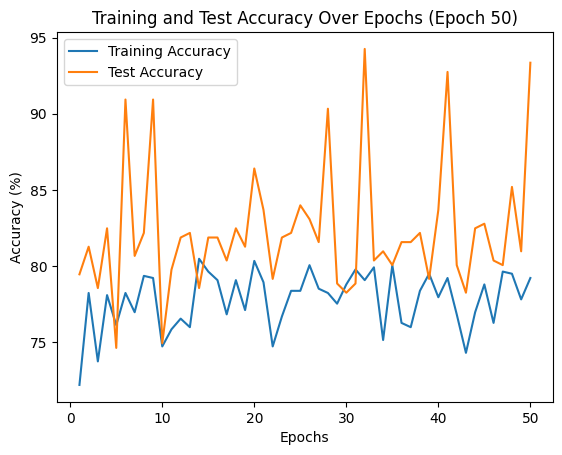

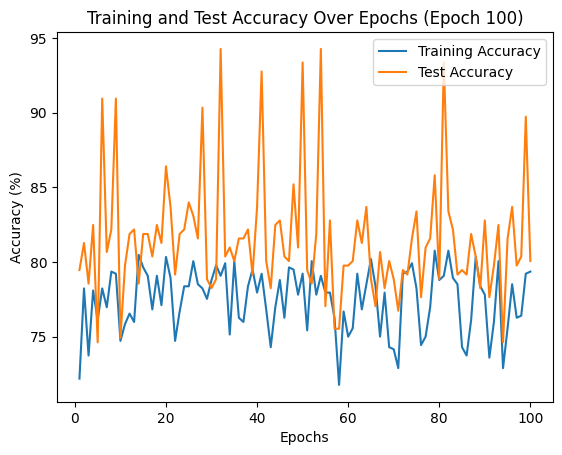

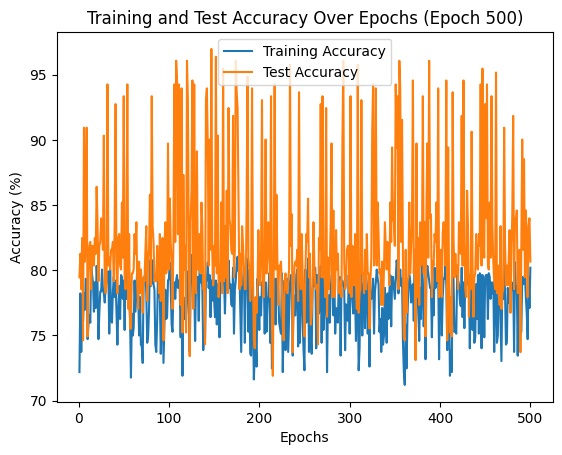

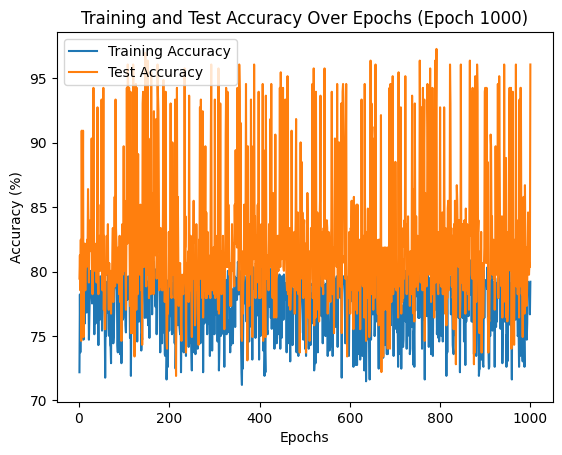

In [806]:
for i,epoch in enumerate(epochs_range):
    epochs_ranges = range(1, epoch + 1)
# for i, epoch in enumerate(epoch_accuracy):
    plt.plot(epochs_ranges, epoch_accuracy[i][0], label='Training Accuracy')
    plt.plot(epochs_ranges, epoch_accuracy[i][1], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training and Test Accuracy Over Epochs (Epoch {epoch})')
    plt.legend()
    plt.show()

#### **Model Binary Sigmoid**

In [817]:
class SingleLayerPerceptronSigmoid:
    def __init__(self, input_size, learning_rate, epochs):
        np.random.seed(42)
        self.weights = np.random.uniform(-0.3,0.3, size=input_size+1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracy = []
        self.testing_accuracy = []

    def _activation_function(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _activation_function_derivative(self, x):
        return self._activation_function(x) * (1 - self._activation_function(x))

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, x_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)

                # Update weights
                error = label - prediction
                adjustment = error * self._activation_function_derivative(prediction)

                self.weights[1:] += self.learning_rate * adjustment * inputs
                self.weights[0] += self.learning_rate * adjustment

            # Calculate training accuracy at each epoch
            self.training_accuracy.append(self._calculate_accuracy(X_train, y_train))
            self.testing_accuracy.append(self._calculate_accuracy(x_test, y_test))

    def predict(self, X_test):
        predictions = [np.round(self._predict(inputs)).astype(np.int32) for inputs in X_test]
        return np.array(predictions)
    
    def get_weights(self):
        return self.weights

    def get_accuracy(self):
        return [self.training_accuracy, self.testing_accuracy]

##### **Data dinormalisasi**

In [808]:
input_size = x_train_normalize.shape[1]
p = SingleLayerPerceptronSigmoid(input_size, learning_rate=0.01, epochs=1000)
p.train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize)
predict = p.predict(x_test_normalize)

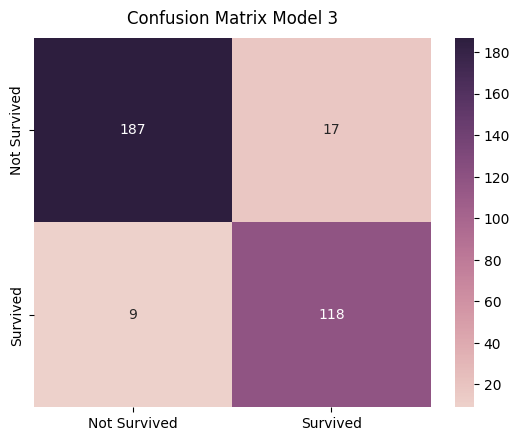

,precision,recall,f1-score,support
Not Survived,0.954082,0.916667,0.935000,204.00000
Survived,0.874074,0.929134,0.900763,127.00000
accuracy,0.921450,0.921450,0.921450,0.92145
macro avg,0.914078,0.922900,0.917882,331.00000
weighted avg,0.923384,0.921450,0.921864,331.00000


In [809]:
model3_cf = confusion_matrix(y_test_normalize, predict)
plot_cm(model3_cf, 'Model 3')

model3_report = classification_report(y_test_normalize, predict, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report).transpose()

##### **Data tidak dinormalisasi**

In [810]:
input_size = x_train.shape[1]
p1 = SingleLayerPerceptronSigmoid(input_size, learning_rate=0.01, epochs=1000)
p1.train(x_train, y_train, x_test, y_test)
predict1 = p1.predict(x_test)

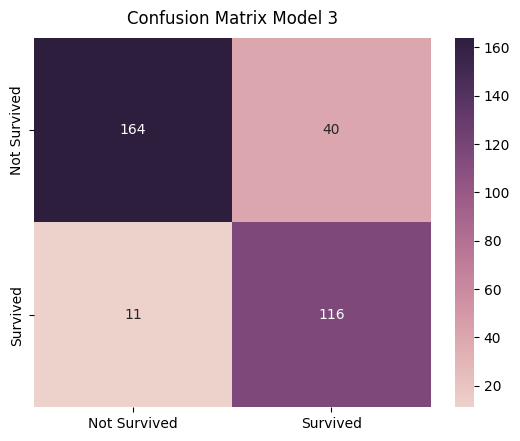

,precision,recall,f1-score,support
Not Survived,0.937143,0.803922,0.865435,204.000000
Survived,0.743590,0.913386,0.819788,127.000000
accuracy,0.845921,0.845921,0.845921,0.845921
macro avg,0.840366,0.858654,0.842612,331.000000
weighted avg,0.862879,0.845921,0.847921,331.000000


In [811]:
model3_cf1 = confusion_matrix(y_test, predict1)
plot_cm(model3_cf1, 'Model 3')

model3_report1 = classification_report(y_test, predict1, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report1).transpose()

##### **Menggunakan kolom Sex & Age**

In [812]:
input_size = x_train_2col.shape[1]
p2 = SingleLayerPerceptronSigmoid(input_size, learning_rate=0.01, epochs=1000)
p2.train(x_train_2col, y_train_2col, x_test_2col, y_test_2col)
predict2 = p2.predict(x_test_2col)

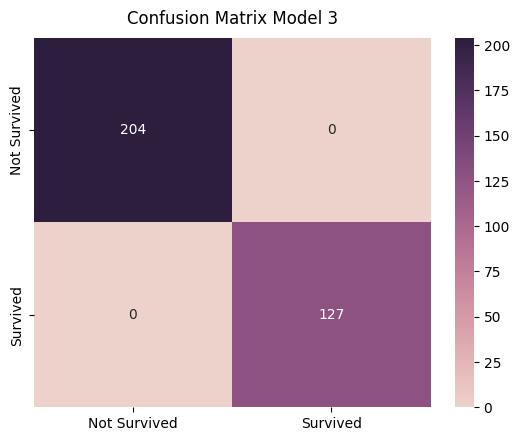

,precision,recall,f1-score,support
Not Survived,1.0,1.0,1.0,204.0
Survived,1.0,1.0,1.0,127.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,331.0
weighted avg,1.0,1.0,1.0,331.0


In [813]:
model3_cf2 = confusion_matrix(y_test_2col, predict2)
plot_cm(model3_cf2, 'Model 3')

model3_report2 = classification_report(y_test_2col, predict2, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report2).transpose()

##### **Menggunakan kolom Sex, Age, Pclass, SibSp, Parch**

In [814]:
input_size = x_train_3col.shape[1]
p3 = SingleLayerPerceptronSigmoid(input_size, learning_rate=0.01, epochs=1000)
p3.train(x_train_3col, y_train_3col, x_test_3col, y_test_3col)
predict3 = p3.predict(x_test_3col)

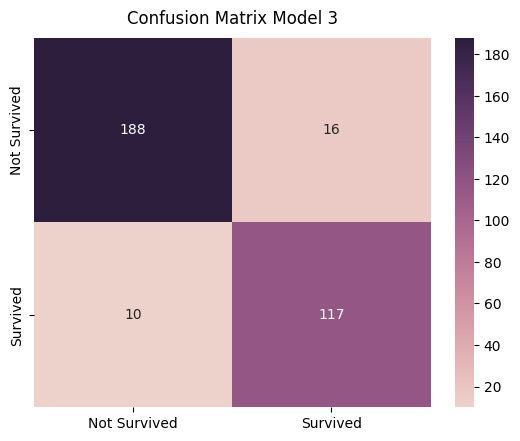

,precision,recall,f1-score,support
Not Survived,0.949495,0.921569,0.935323,204.00000
Survived,0.879699,0.921260,0.900000,127.00000
accuracy,0.921450,0.921450,0.921450,0.92145
macro avg,0.914597,0.921414,0.917662,331.00000
weighted avg,0.922715,0.921450,0.921770,331.00000


In [815]:
model3_cf3 = confusion_matrix(y_test_3col, predict3)
plot_cm(model3_cf3, 'Model 3')

model3_report3 = classification_report(y_test_3col, predict3, output_dict=True, target_names=['Not Survived',"Survived"])
pd.DataFrame(model3_report3).transpose()

##### **Penggunaan Learning Rate**

In [818]:
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

input_size = x_train_normalize.shape[1]
lr_accuracy1 = []
lr_pred1 = []
for lr in learning_rate:
    perceptron_lr1 = SingleLayerPerceptronSigmoid(input_size, learning_rate=lr, epochs=1000)
    perceptron_lr1.train(x_train_normalize, y_train_normalize, x_test_normalize, y_test_normalize)
    lr_accuracy1.append(perceptron_lr1.get_accuracy())
    pred_lr1 = perceptron_lr1.predict(x_test_normalize)
    lr_pred1.append(pred_lr1)

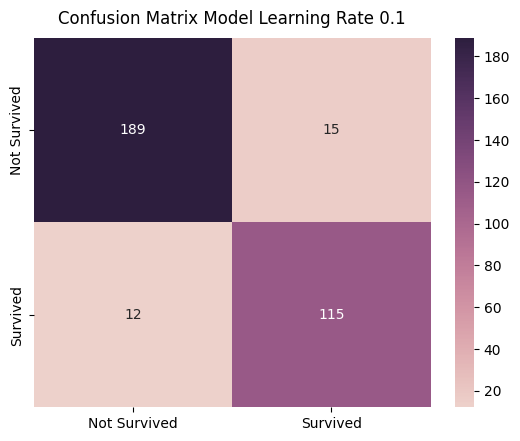

              precision    recall  f1-score     support
Not Survived   0.940299  0.926471  0.933333  204.000000
Survived       0.884615  0.905512  0.894942  127.000000
accuracy       0.918429  0.918429  0.918429    0.918429
macro avg      0.912457  0.915991  0.914137  331.000000
weighted avg   0.918934  0.918429  0.918603  331.000000




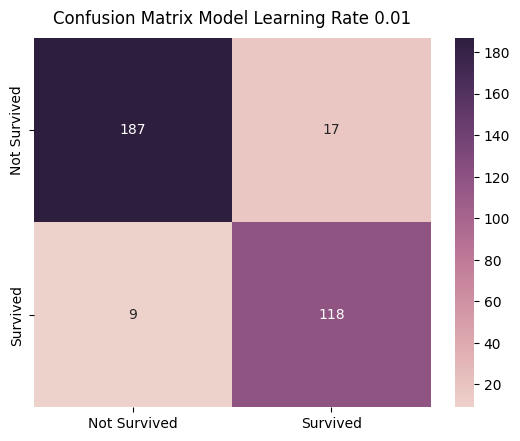

              precision    recall  f1-score    support
Not Survived   0.954082  0.916667  0.935000  204.00000
Survived       0.874074  0.929134  0.900763  127.00000
accuracy       0.921450  0.921450  0.921450    0.92145
macro avg      0.914078  0.922900  0.917882  331.00000
weighted avg   0.923384  0.921450  0.921864  331.00000




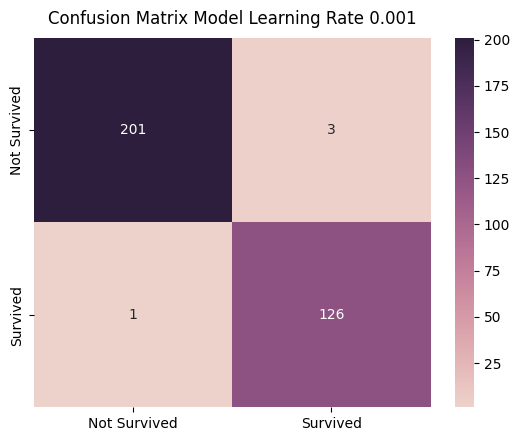

              precision    recall  f1-score     support
Not Survived   0.995050  0.985294  0.990148  204.000000
Survived       0.976744  0.992126  0.984375  127.000000
accuracy       0.987915  0.987915  0.987915    0.987915
macro avg      0.985897  0.988710  0.987261  331.000000
weighted avg   0.988026  0.987915  0.987933  331.000000




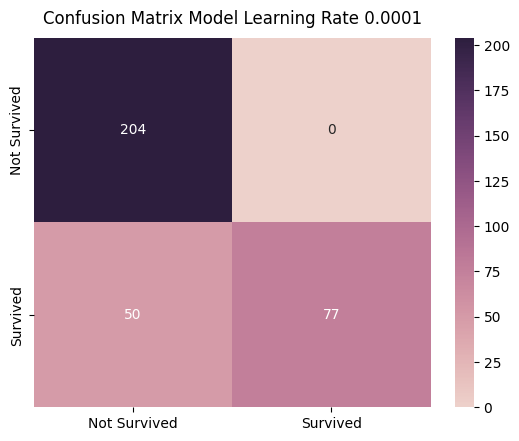

              precision    recall  f1-score     support
Not Survived   0.803150  1.000000  0.890830  204.000000
Survived       1.000000  0.606299  0.754902  127.000000
accuracy       0.848943  0.848943  0.848943    0.848943
macro avg      0.901575  0.803150  0.822866  331.000000
weighted avg   0.878678  0.848943  0.838676  331.000000




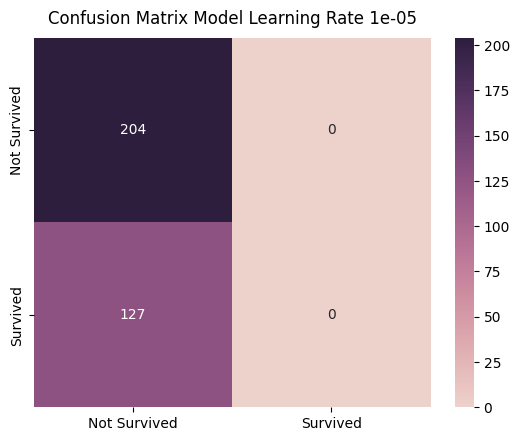

              precision    recall  f1-score     support
Not Survived   0.616314  1.000000  0.762617  204.000000
Survived       0.000000  0.000000  0.000000  127.000000
accuracy       0.616314  0.616314  0.616314    0.616314
macro avg      0.308157  0.500000  0.381308  331.000000
weighted avg   0.379843  0.616314  0.470012  331.000000




c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [819]:
for i, lr in enumerate(lr_pred1):
    model3_cf_lr = confusion_matrix(y_test_normalize, lr)
    plot_cm(model3_cf_lr, f'Model Learning Rate {learning_rate[i]}')
    model3_report_lr = classification_report(y_test_normalize, lr, output_dict=True, target_names=['Not Survived',"Survived"])
    print(pd.DataFrame(model3_report_lr).transpose())
    print("\n")

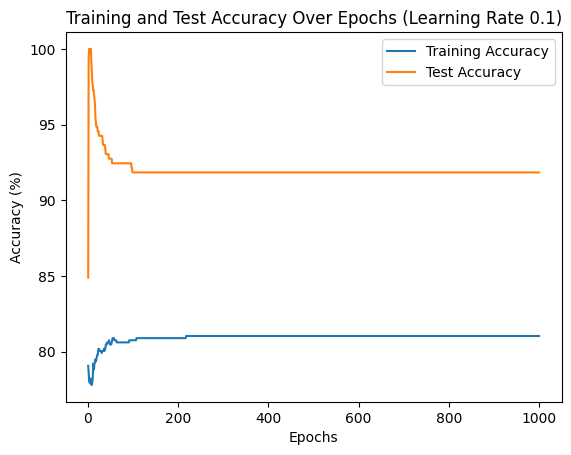

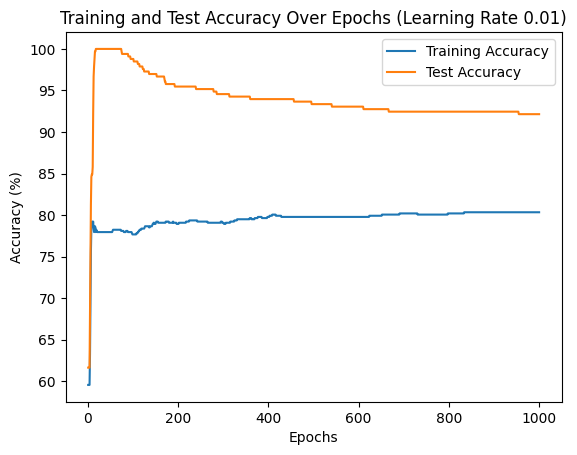

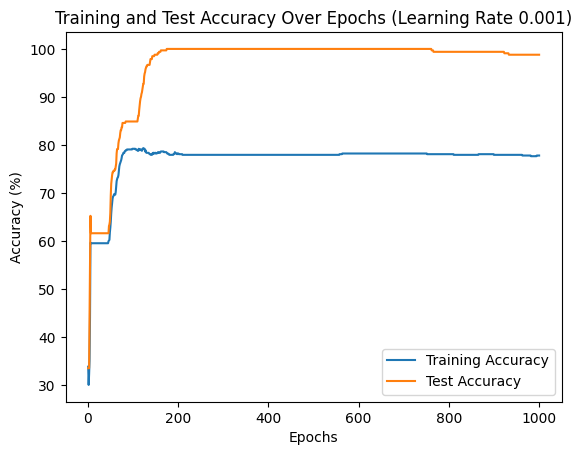

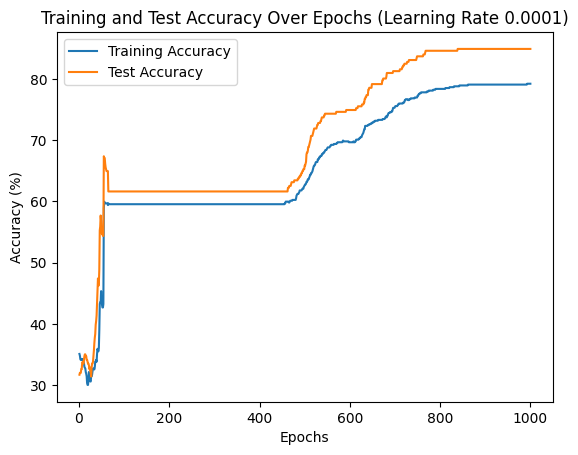

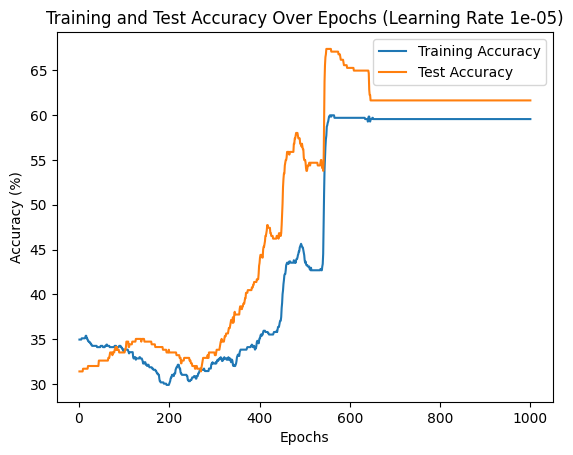

In [820]:
epochs_range1 = range(1, 1000 + 1)
for i, lr in enumerate(lr_accuracy1):
    plt.plot(epochs_range1, lr[0], label='Training Accuracy')
    plt.plot(epochs_range1, lr[1], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training and Test Accuracy Over Epochs (Learning Rate {learning_rate[i]})')
    plt.legend()
    plt.show()

##### **Penggunaan Epoch**